In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve,auc
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv("fraud_loan.csv")

In [3]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

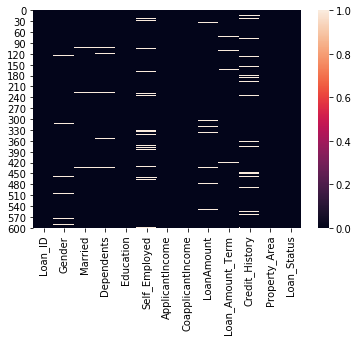

In [7]:
sns.heatmap(loan.isnull())

In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace= True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace= True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace= True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace= True)  
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace= True) 

In [10]:
loan['LoanAmount'].fillna(loan.LoanAmount.mean(),inplace=True)
loan['Loan_Amount_Term'].fillna(loan.Loan_Amount_Term.mean(),inplace=True)

In [11]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

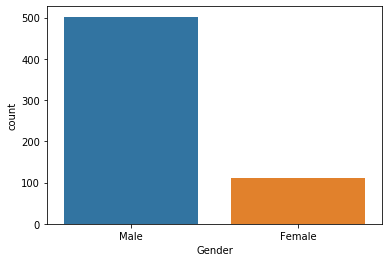

In [12]:
sns.countplot(loan['Gender'])

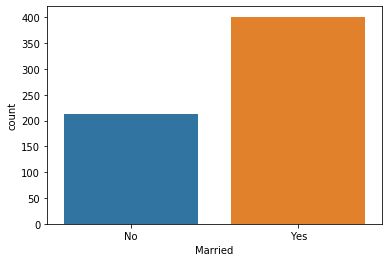

In [13]:
sns.countplot(loan['Married'])

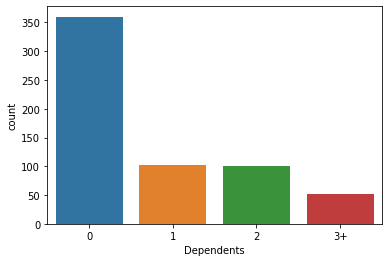

In [14]:
sns.countplot(loan['Dependents'])

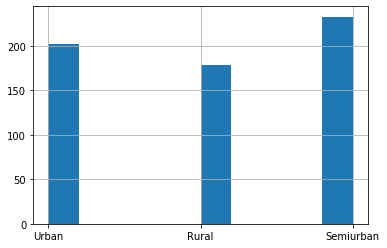

In [15]:
loan['Property_Area'].hist()

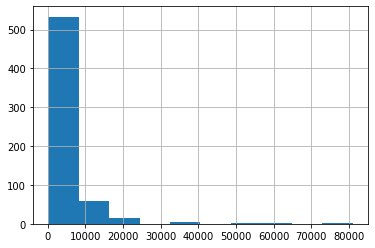

In [16]:
loan['ApplicantIncome'].hist()

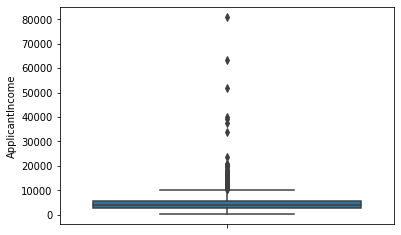

In [17]:
sns.boxplot(y='ApplicantIncome',data=loan)

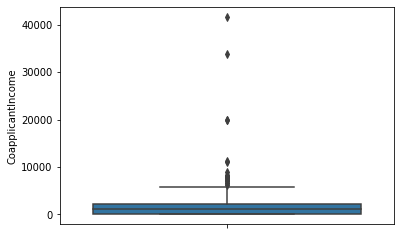

In [18]:
sns.boxplot(y='CoapplicantIncome',data=loan)

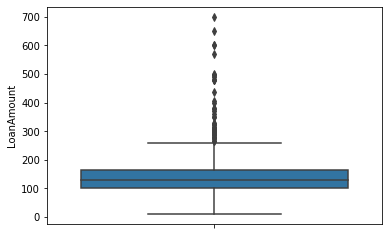

In [19]:
sns.boxplot(y='LoanAmount',data=loan)

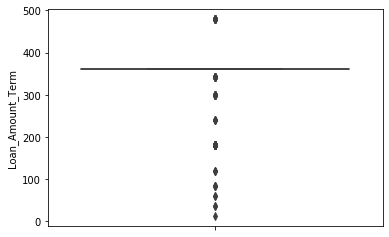

In [20]:
sns.boxplot(y='Loan_Amount_Term',data=loan)

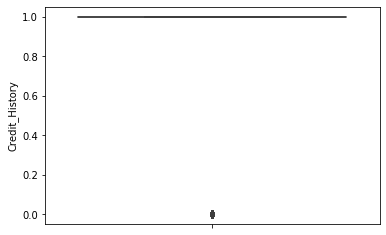

In [21]:
sns.boxplot(y='Credit_History',data=loan)

There is a outliers in Applicant income,Credit history,coapplication,loan amount term,loan amount.

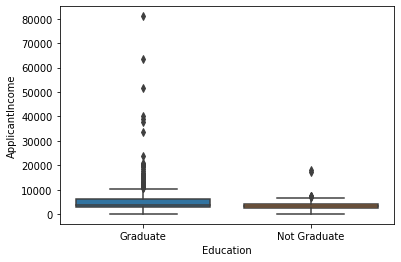

In [22]:
sns.boxplot(x='Education',y='ApplicantIncome',data=loan)

We can observe that there is very less difference in mean of graduate and non-graduate incomee 
but there is higher income for graduates which are outliers

Text(0, 0.5, 'count')

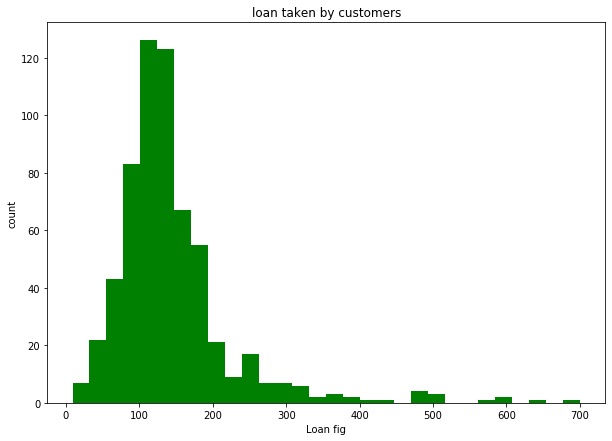

In [23]:
plt.figure(figsize =(10,7))
x=loan['LoanAmount']
plt.hist(x,bins=30,color='green')
plt.title("loan taken by customers")
plt.xlabel("Loan fig")
plt.ylabel("count")

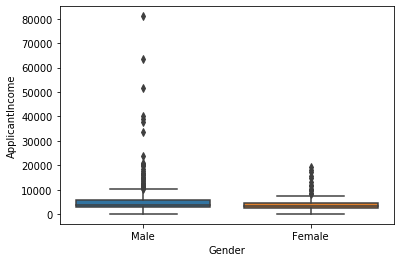

In [24]:
sns.boxplot(x='Gender',y='ApplicantIncome',data=loan)

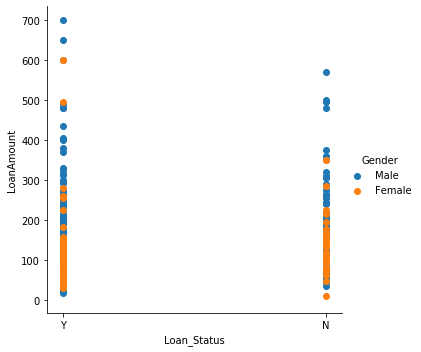

In [25]:
sns.FacetGrid(loan,hue="Gender",size=5)\
.map(plt.scatter,"Loan_Status","LoanAmount")\
.add_legend()
plt.show()

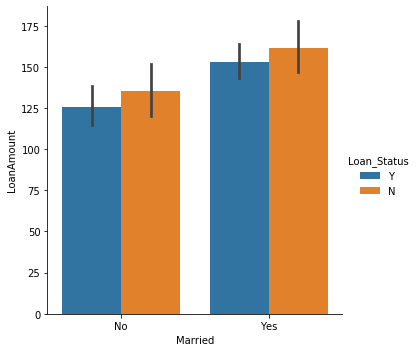

In [26]:
sns.catplot(x="Married",y="LoanAmount",hue="Loan_Status",data=loan,kind="bar")

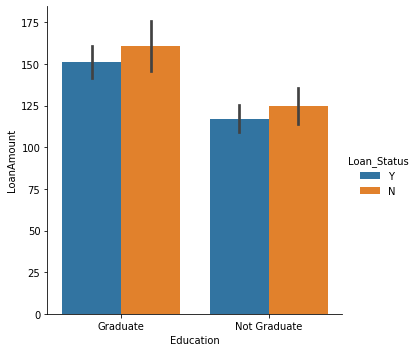

In [27]:
sns.catplot(x="Education",y="LoanAmount",hue="Loan_Status",data=loan,kind="bar")

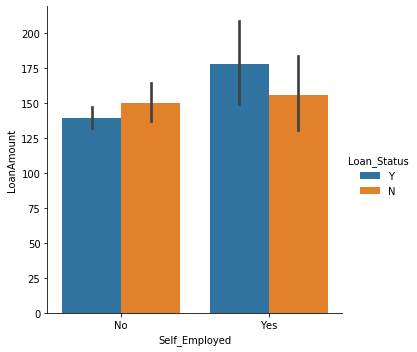

In [28]:
sns.catplot(x="Self_Employed",y="LoanAmount",hue="Loan_Status",data=loan,kind="bar")

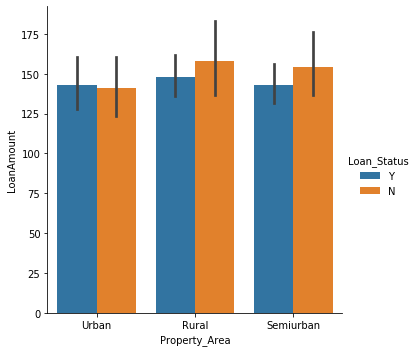

In [29]:
sns.catplot(x="Property_Area",y="LoanAmount",hue="Loan_Status",data=loan,kind="bar")

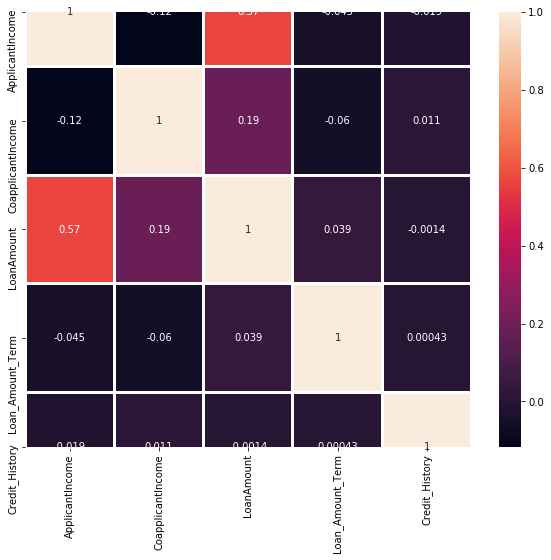

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(loan.corr(), annot = True, linewidths=2)

In [31]:
loan.drop(['Loan_ID'],axis=1 , inplace=True)

In [32]:
cat=['Gender','Married','Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
for val in cat:
    le=LabelEncoder()
    loan[val]=le.fit_transform(loan[val].astype("str"))
loan.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [33]:
X= loan.drop(['Loan_Status'], axis = 1)
print(X.shape)

(614, 11)


In [34]:
y =loan['Loan_Status'] 
print(y.shape)

(614,)


In [35]:
from scipy.stats import zscore

z_score=abs(zscore(loan))
print(loan.shape)
loan=loan.loc[(z_score<3).all(axis=1)]
print(loan.shape)

(614, 12)
(577, 12)


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [38]:
X_train.shape

(411, 11)

In [39]:
X_test.shape

(203, 11)

In [40]:
y_train.shape

(411,)

In [41]:
y_test.shape

(203,)

In [42]:
model=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(X_train,y_train)
    print(m)
    pred=m.predict(X_test)
    ACC=accuracy_score(y_test,pred)
    print("Accuracy score of", m ,"is: ",ACC)
    
    CVS=cross_val_score(m,X,y,cv=10,scoring="accuracy").mean()
    print("Cross_val_score=",CVS)
    
    CM=confusion_matrix(y_test,pred)
    print("Confusion matrix of", m , "is: ",CM)
    
    
    print("Classification report of", m , "is: ",classification_report(y_test,pred))
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    ROC_AUC=auc(false_positive_rate,true_positive_rate)
    print("Roc_auc_score=",ROC_AUC)
    print("\n")
    print("-------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is:  0.8423645320197044
Cross_val_score= 0.8078064012490241
Confusion matrix of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, so

Cross_val_score= 0.7443403590944574
Confusion matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:  [[ 33  26]
 [ 21 123]]
Classification report of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None,

I will choose Logistic Regression as my final model because it perform well in this dataset.

Accuracy_score=84.23

Cross_val_score= 80.7

Roc_auc_score= 74

In [54]:
from sklearn.externals import joblib

joblib.dump(m,'loan.pkl')

['loan.pkl']